In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# pip install mglearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
gen = pd.read_csv('/Users/arnav/Documents/gender_voice_dataset.csv')

In [6]:
gen_data = pd.DataFrame(gen)

In [7]:
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<AxesSubplot:>

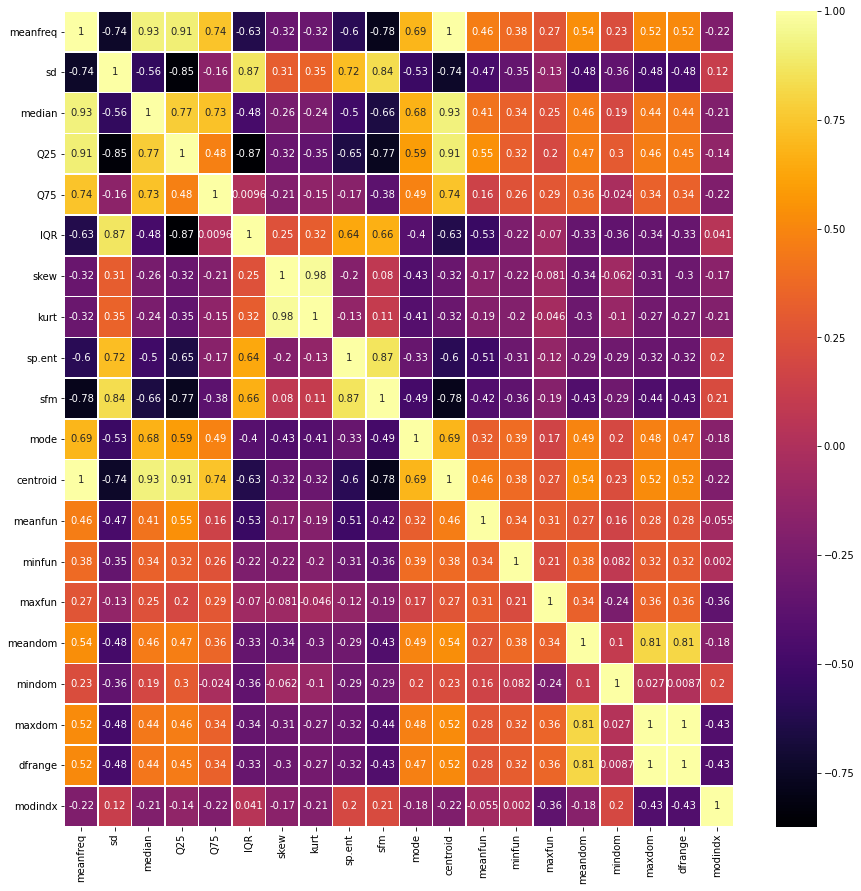

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='inferno',linewidths=.5)

In [11]:
import mglearn

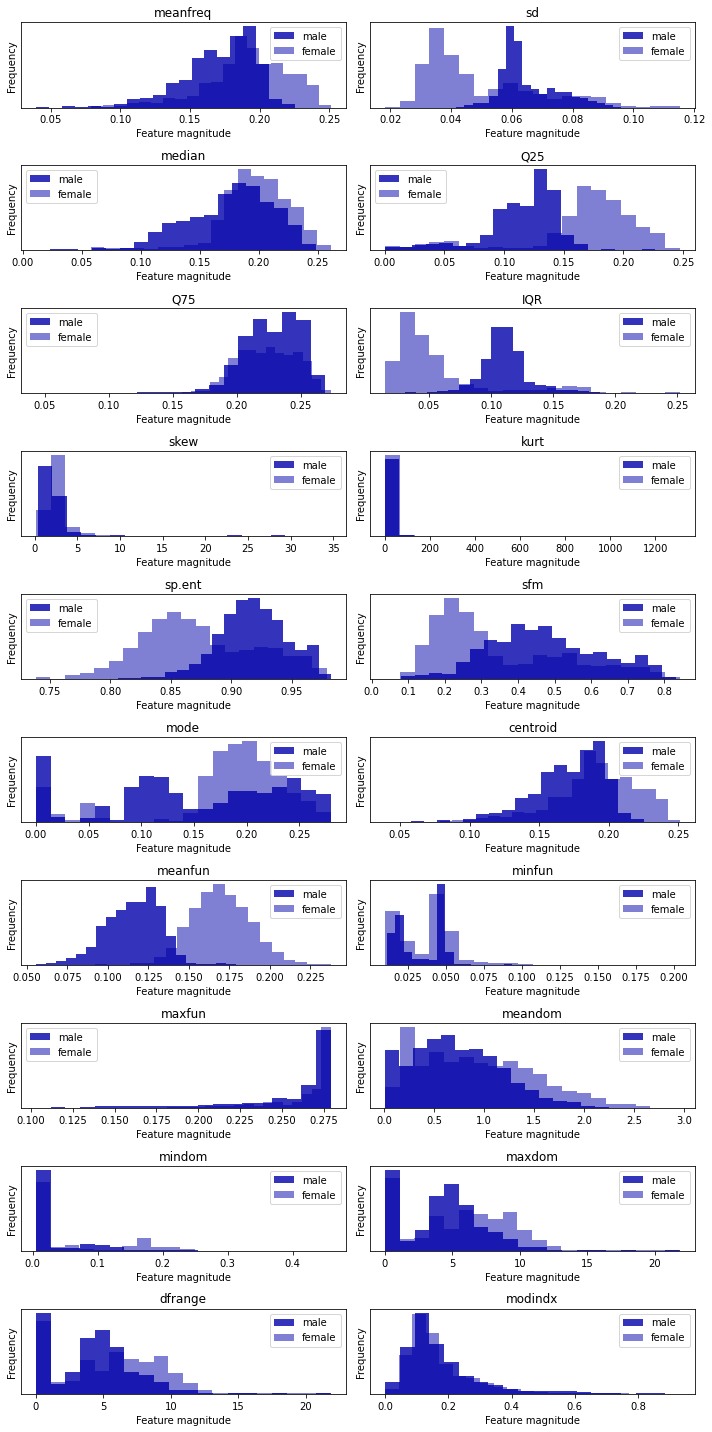

In [12]:
#Plot the Histograms:
male=gen.loc[gen['label']=='male']
female=gen.loc[gen['label']=='female']
fig, axes = plt.subplots(10,2,figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i],bins=20,color=mglearn.cm3(0),alpha=.8)
    ax[i].hist(female.iloc[:,i],bins=20,color=mglearn.cm3(0),alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male","female"],loc="best")
fig.tight_layout()

In [13]:
gen_new = gen_data.drop(['dfrange','kurt','sfm','meandom','meanfreq'],axis=1)

In [14]:
gen_new.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom',
       'modindx', 'label'],
      dtype='object')

In [15]:
X = gen_new.drop(['label'],axis=1)
y =  gen_new['label']

In [16]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [17]:
#Random forest Code:
forest = RandomForestClassifier(n_estimators=500,random_state=101).fit(Xtrain,ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain,ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest,ytest)))
#n_estimators = No. of decision trees to be involved in your analysis.
#random_state: This is always a necessity to use. It is because to make your results reproducable.
# From next time, if i use the same model then, i will get the results within the same model(df)

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.99


In [18]:
#Support Vector Machines:
svm=SVC().fit(Xtrain,ytrain)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain,ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest,ytest)))

Support Vector Machine
Accuracy on training set: 0.72
Accuracy on test set: 0.73


In [19]:
#Structured Workflow: ETL Design:

#Boosting(Gradient Ascent & Descents) | L1 & L2 Regularizations: Deep Learning....

In [20]:
#SVM Concept: CART: Supervised ML Algo.
#SVM: It is used to classify both linear separable and non-linear sperable datas.
#I only have 2 classes say red & green, and if we are able to find a boundary that splits the 2 class means, it is said to be linearly separable.
#1-D Data. (X1,X2,X3 etc.)
#In the 2-d Space we need not only a line but sort of a boundary that can better classify my variables.


#Hyperplane: Line & Plane?

#Class & Regression(1D | 2D) vs SVM(3D-1D & 2D are included)?

In [22]:
#Random Forests?
#It is made from Decision trees only. When you combine several decision trees, then it becomes a R.F classifer.
#Decision 🌲: It is a decision support technique that forms a tree-like structure.

#Decision tree has 3 components: decision nodes, leaf nodes & a root node.


#Decision Boundary:1-D or 2-D space: CAR. #hyperplane: 3-D space.

In [ ]:
#You have the leverage to use both of them: Class. | D.T & R.F: time-crunch: D.T & R.F. 
#A Decision Tree algo. divides a training dataset into branches, which further seggregates into more branches.
#This sequential flow continues untill a leaf node is attained. The leaf node cannot be seggregated further.
